# Engagement score 

In [1]:
# Import necessary modules
import sys
sys.path.append('../scripts')  
from engagement_score import calculate_engagement_score

# Define paths
input_file = '../assets/data/aggregated_xdr_data.csv'
output_file = "../assets/data/engagement_scores.csv"      

# Call the engagement function
calculate_engagement_score(input_file, output_file)


      Bearer Id  engagement_score
0  6.917538e+18          0.983794
1  6.917538e+18          1.160657
2  6.917538e+18          1.345800
3  6.917538e+18          1.440488
4  6.917538e+18          1.016334
Engagement scores have been saved to ../assets/data/engagement_scores.csv


<function engagement_score.calculate_engagement_score(input_file, output_file)>

# experience score

In [3]:
import sys
sys.path.append('../scripts')  
from experience_score import load_user_data, calculate_experience_score, save_data_with_scores

import numpy as np
centroid_cluster_1 = np.array([2.064230e+07, 65.010918, 1372.051897])


user_data_path = '../assets/data/aggregated_xdr_data.csv'  
user_data = load_user_data(user_data_path)


user_data_with_scores = calculate_experience_score(user_data, centroid_cluster_1)


output_path = '../assets/data/user_data_with_experience_scores.csv'  

# Save the data with experience scores to the output path
save_data_with_scores(user_data_with_scores, output_path)



Experience scores saved to ../assets/data/user_data_with_experience_scores.csv


# combining the experience and enagement score 

In [4]:
import pandas as pd

# File paths for the two datasets
file_path_1 = '../assets/data/engagement_scores.csv'
file_path_2 = '../assets/data/user_data_with_experience_scores.csv'

# Load the datasets from CSV files
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Merge the datasets on 'Bearer Id'
merged_df = pd.merge(df1, df2, on='Bearer Id', how='inner')

# Save the merged dataset to a new CSV file
merged_df.to_csv('../assets/data/merged_dataset.csv', index=False)

# Display the merged dataset
print(merged_df)


           Bearer Id  engagement_score  Number_of_Sessions  \
0       6.917538e+18          0.983794                   1   
1       6.917538e+18          1.160657                   1   
2       6.917538e+18          1.345800                   1   
3       6.917538e+18          1.440488                   1   
4       6.917538e+18          1.016334                   1   
...              ...               ...                 ...   
134703  1.318654e+19          1.300365                   1   
134704  1.318654e+19          0.625165                   1   
134705  1.318654e+19          1.164043                   1   
134706  1.318654e+19          0.623930                   1   
134707  1.318654e+19          0.699664                   1   

        Total_Session_Duration  Total_Download  Total_Upload  \
0                      24534.0     500721999.0    41704610.0   
1                      21489.0     709549265.0    38693596.0   
2                      27786.0     854465860.0    15548926.0   

# Satisfaction score 

In [1]:
import sys
sys.path.append('../scripts')  
from satisfaction_score import calculate_satisfaction_score

input_file = '../assets/data/merged_dataset.csv'  
output_file = '../assets/data/satisfaction_score.csv' 
top_10_output_file = '../assets/data/10_satisfaction.csv'


calculate_satisfaction_score(input_file, output_file,top_10_output_file)

Top 10 Satisfied Customers:
           Bearer Id  satisfaction_score
103378  1.304243e+19        1.032117e+07
97305   1.304243e+19        1.032116e+07
37995   7.349883e+18        1.032116e+07
88125   1.304243e+19        1.032116e+07
88030   1.304243e+19        1.032116e+07
93908   1.304243e+19        1.032116e+07
86526   1.304243e+19        1.032116e+07
119186  1.311448e+19        1.032116e+07
82371   1.304243e+19        1.032116e+07
88183   1.304243e+19        1.032116e+07
Top 10 satisfied customers have been saved to ../assets/data/10_satisfaction.csv


<function satisfaction_score.calculate_satisfaction_score(input_file, output_file, top_10_output_file)>

# Regression Model for Satisfaction Analysis

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

def train_satisfaction_model(input_file, output_model_file):
    # Load the dataset
    data = pd.read_csv(input_file)
    
    # Ensure the dataset contains the necessary columns
    required_columns = ['engagement_score', 'experience_score', 'Number_of_Sessions', 
                        'Total_Session_Duration', 'Total_Data_Volume', 'satisfaction_score']
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"The dataset must contain the following columns: {required_columns}")
    
    # Select features (X) and target (y)
    X = data[['engagement_score', 'experience_score', 'Number_of_Sessions', 
              'Total_Session_Duration', 'Total_Data_Volume']]
    y = data['satisfaction_score']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")
    
    # Save the trained model
    import joblib
    joblib.dump(model, output_model_file)
    print(f"Trained model saved to {output_model_file}")
    
    return model

# Example usage:
input_file = '../assets/data/satisfaction_score.csv'  # Replace with the path to your input CSV file
output_model_file = '../assets/data/model.joblib'  # Replace with the desired model output file path

trained_model = train_satisfaction_model(input_file, output_model_file)


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.10624286797664897
Mean Absolute Error (MAE): 0.22933701079152954
R^2 Score: 0.4893930611334242
Trained model saved to ../assets/data/model.joblib


# K means clustering

Clustering completed and saved to the dataset.


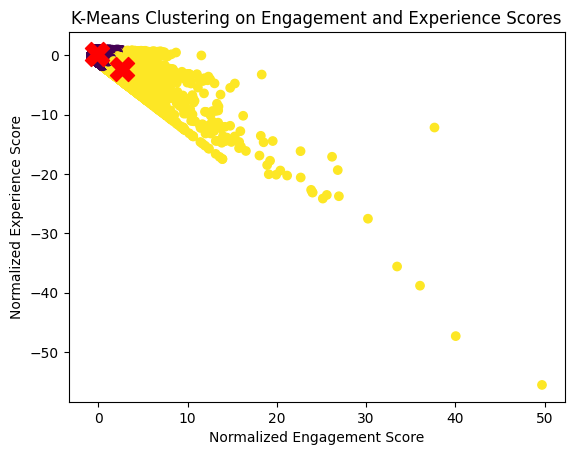

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../assets/data/satisfaction_score.csv')

# Ensure the dataset has the required columns
required_columns = ['engagement_score', 'experience_score']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The dataset must contain the following columns: {required_columns}")

# Extract the engagement and experience scores
X = data[['engagement_score', 'experience_score']]

# Normalize the scores
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply K-Means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
data['engagement_experience_cluster'] = kmeans.fit_predict(X_normalized)

# Get the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Save the updated dataset
data.to_csv("../assets/data/output_with_clusters.csv", index=False)
print("Clustering completed and saved to the dataset.")

# Optional: Visualize the clusters
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=data['engagement_experience_cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Cluster centers
plt.xlabel('Normalized Engagement Score')
plt.ylabel('Normalized Experience Score')
plt.title('K-Means Clustering on Engagement and Experience Scores')
plt.show()


# Average satisfaction & experience score per cluster

In [8]:
import pandas as pd

# Load the dataset with clusters
data = pd.read_csv("../assets/data/output_with_clusters.csv")

# Ensure necessary columns are present
required_columns = ['engagement_experience_cluster', 'satisfaction_score', 'experience_score']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The dataset must contain the following columns: {required_columns}")

# Aggregate the average satisfaction and experience score per cluster
cluster_averages = data.groupby('engagement_experience_cluster')[['satisfaction_score', 'experience_score']].mean()

# Rename columns for clarity
cluster_averages.rename(
    columns={
        'satisfaction_score': 'average_satisfaction_score',
        'experience_score': 'average_experience_score'
    },
    inplace=True
)

# Save the aggregated results
output_path = "../assets/data/aggregated_scores_per_cluster.csv"
cluster_averages.to_csv(output_path)
print(f"Aggregated averages saved to {output_path}")

# Display the aggregated results
print(cluster_averages)


Aggregated averages saved to ../assets/data/aggregated_scores_per_cluster.csv
                               average_satisfaction_score  \
engagement_experience_cluster                               
0                                            1.032115e+07   
1                                            1.032115e+07   

                               average_experience_score  
engagement_experience_cluster                            
0                                          2.064230e+07  
1                                          2.064230e+07  


# selected column 

In [2]:
import pandas as pd


df = pd.read_csv('../assets/data/satisfaction_score.csv')

# Select only the desired columns
selected_columns = df[['Bearer Id', 'engagement_score', 'experience_score', 'satisfaction_score']]

# Display or save the resulting dataset
print(selected_columns)
selected_columns.to_csv('../assets/data/filtered_dataset.csv', index=False)


           Bearer Id  engagement_score  experience_score  satisfaction_score
0       6.917538e+18          0.983794      2.064230e+07        1.032115e+07
1       6.917538e+18          1.160657      2.064230e+07        1.032115e+07
2       6.917538e+18          1.345800      2.064230e+07        1.032115e+07
3       6.917538e+18          1.440488      2.064230e+07        1.032115e+07
4       6.917538e+18          1.016334      2.064230e+07        1.032115e+07
...              ...               ...               ...                 ...
134703  1.318654e+19          1.300365      2.064230e+07        1.032115e+07
134704  1.318654e+19          0.625165      2.064230e+07        1.032115e+07
134705  1.318654e+19          1.164043      2.064230e+07        1.032115e+07
134706  1.318654e+19          0.623930      2.064230e+07        1.032115e+07
134707  1.318654e+19          0.699664      2.064230e+07        1.032115e+07

[134708 rows x 4 columns]
